# 05_clustering

1. Zaimplementuj Kmeans clustering dla datasetu wine.<br> 
<br> zmniejsz wymiar datasetu,  korzystając  StandardScaler oraz PCA(n_components=2, whiten=True) -> tylko do wizualizacji<br> 
<br> narysuj wykres typu "scatter" -> sprawdź czy widać "klastry"<br> 
<br> korzystając z metody "Elbow" wyznacz najlepszą liczbę n_clusters (wykorzystaj for loop, np range(1,11)) ->wykres<br> 
<br> korzystając z metryki silhouette_score, ponownie znajdź najlepszą liczbę n_clusters i porównaj z met. powyżej -> wykres<br> 
<br> utwórz wykres typu "scatter", nadając każdemu punktowi kolor zgodny z danym klastrem <br> 
<br> wyznacz wartość accuracy, porównując numer klastra z kolumną "target" ('y') <br> 
<br> w algorytmie KMeans zmień init='random' na init='k-means++' i porównaj wyniki accuracy.<br> 
<br> 
2. Wyznacz liczbę klastrów korzystając z MeanShift i porównaj z pkt.1

Rozwiązanie prześlij jako printscreen (jpg, pdf).
Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_05.jpg



In [94]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from scipy.spatial.distance import cdist

from itertools import cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
X, y = load_wine()['data'], load_wine()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
df = pd.DataFrame(columns=['Model', 'Score'])

# 1.1

StandardScaler standardize features by removing the mean and scaling to unit variance.

In [20]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=2, whiten=True )
X_reducted = pca.fit_transform(X_train_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.35684314 0.19825228]
[25.66578348 19.13043936]


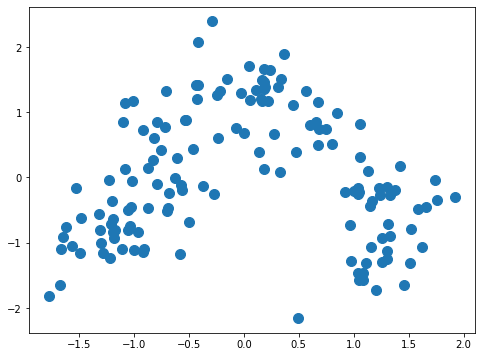

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reducted[:, 0], X_reducted[:, 1], s=100)
plt.show()

## The Elbow method

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

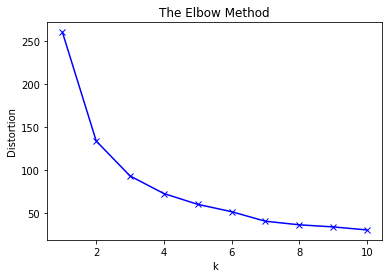

In [30]:
# k means determine k
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [23]:
cluster = KMeans(3, random_state=0)
model = cluster.fit(X_train_std)

## The Silhouette_score method

We can say that the clusters are well apart from each other as the silhouette score is closer to 1. The bigger score the better.

For n_clusters = 2 The average silhouette_score is : 0.6568536504294317
For n_clusters = 3 The average silhouette_score is : 0.5711381937868838
For n_clusters = 4 The average silhouette_score is : 0.560594106006062
For n_clusters = 5 The average silhouette_score is : 0.5040308632722521
For n_clusters = 6 The average silhouette_score is : 0.5656413100386369
For n_clusters = 7 The average silhouette_score is : 0.5616196384056884
For n_clusters = 8 The average silhouette_score is : 0.548621360407612
For n_clusters = 9 The average silhouette_score is : 0.52672536634178


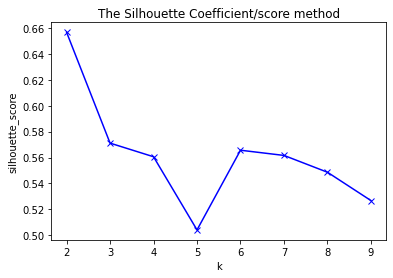

In [29]:
range_n_clusters = list(range(2, 10))
silhouette_score = []

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_score.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('The Silhouette Coefficient/score method')
plt.show()

In [34]:
km_cls_elbow = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300
)

y_km_elbow = km_cls_elbow.fit_predict(X_reducted)
km_cls_elbow.cluster_centers_

array([[-1.07197432, -0.64970825],
       [ 1.25460831, -0.73124479],
       [-0.01559845,  1.05600662]])

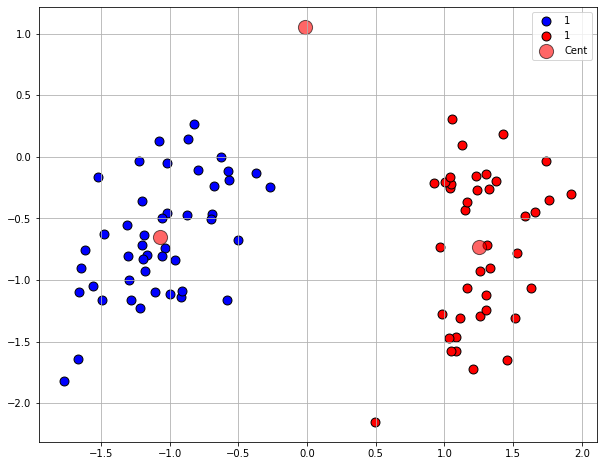

In [35]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X_reducted[y_km_elbow == 0, 0],
    X_reducted[y_km_elbow == 0, 1],
    c='blue', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X_reducted[y_km_elbow == 1, 0],
    X_reducted[y_km_elbow == 1, 1],
    c='red', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    km_cls_elbow.cluster_centers_[:, 0],
    km_cls_elbow.cluster_centers_[:, 1],
    c='r', marker="o", s=200, alpha=0.6,
    edgecolor="black", label='Cent'
)

plt.legend()
plt.grid()
plt.show()

In [36]:
km_cls_silh = KMeans(
    n_clusters=2,
    init='random',
    n_init=10,
    max_iter=300
)

y_km_silh = km_cls_silh.fit_predict(X_reducted)
km_cls_silh.cluster_centers_

array([[-0.52049063,  0.27911676],
       [ 1.23926341, -0.66456372]])

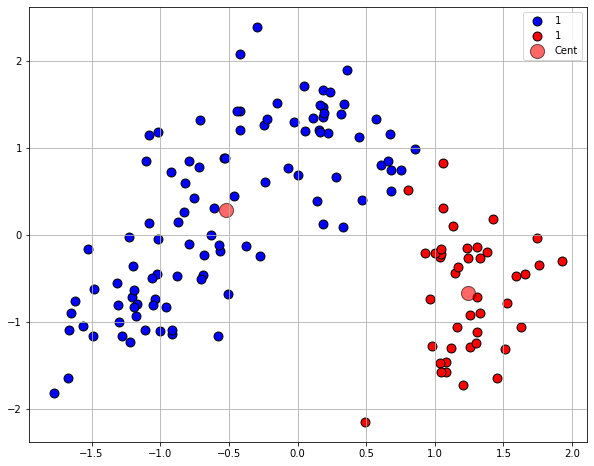

In [37]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X_reducted[y_km_silh == 0, 0],
    X_reducted[y_km_silh == 0, 1],
    c='blue', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X_reducted[y_km_silh == 1, 0],
    X_reducted[y_km_silh == 1, 1],
    c='red', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    km_cls_silh.cluster_centers_[:, 0],
    km_cls_silh.cluster_centers_[:, 1],
    c='r', marker="o", s=200, alpha=0.6,
    edgecolor="black", label='Cent'
)

plt.legend()
plt.grid()
plt.show()

In [88]:
init_list = ["random", "k-means++"]
n_cl = [2,3]

for i in init_list:
    for j in n_cl:
        model = KMeans(
            n_clusters=j,
            init=i,
            n_init=10,
            max_iter=300,
        ) 

        model.fit(X, y)
        pred = model.predict(X)
        print(f"Kmeans n_clusters={j} with init={i}: accuracy: {accuracy_score(y, pred)}")

Kmeans n_clusters=2 with init=random: accuracy: 0.6573033707865169
Kmeans n_clusters=3 with init=random: accuracy: 0.3539325842696629
Kmeans n_clusters=2 with init=k-means++: accuracy: 0.07303370786516854
Kmeans n_clusters=3 with init=k-means++: accuracy: 0.1853932584269663


# 2 Mean shift

In [108]:
ms = MeanShift(bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 2


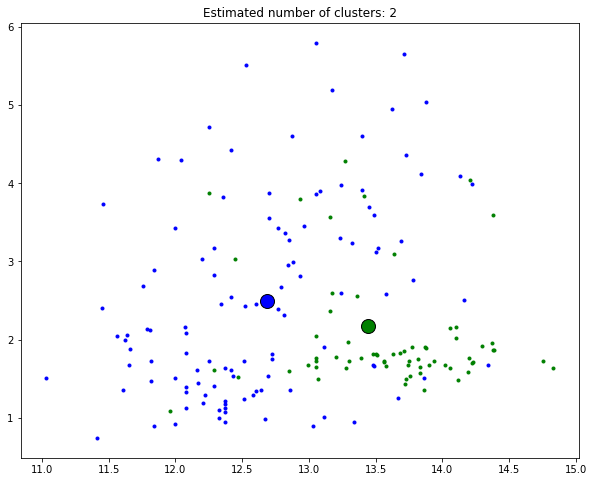

In [109]:
plt.figure(figsize=(10, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()